In [44]:
#required imports
import pandas as pd
import re
from datetime import datetime

#required data
actorRankingDf = pd.read_csv("ActorRanking.csv")
directorRankingDf = pd.read_csv("DirectorRanking.csv")
movieDetailDf = pd.read_csv("MovieDetail.csv")

In [45]:
#Data info
print(actorRankingDf.info())
print(directorRankingDf.info())
print(movieDetailDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
actorId                 301 non-null int64
actorName               301 non-null object
movieCount              301 non-null int64
ratingSum               301 non-null int64
normalizedMovieRank     299 non-null float64
googleHits              301 non-null int64
normalizedGoogleRank    189 non-null float64
normalizedRating        301 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 18.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
directorId              118 non-null int64
directorName            117 non-null object
movieCount              118 non-null int64
ratingSum               118 non-null int64
normalizedMovieRank     118 non-null float64
googleHits              118 non-null int64
normalizedGoogleRank    118 non-null float64
normalizedRating        118 non-null float64
dtypes: float64(3), in

# some useful insights through visualisation

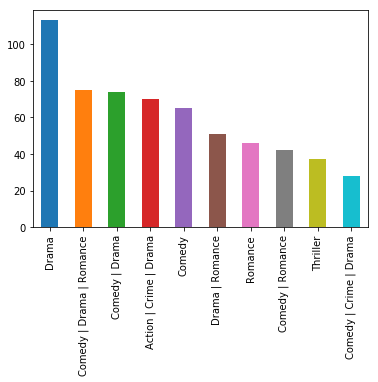

In [46]:
#top 10 genres
#movieDetailDf['genre'].value_counts().head(10)
movieDetailDf['genre'].value_counts().head(10).plot(kind='bar')

### As we can see Drama is the most favourite in indian cinemas, so director and actor are making more movies on that.

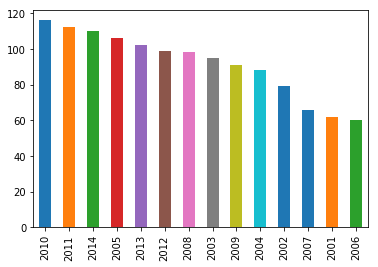

In [47]:
#yearwise moviecount
#movieDetailDf['releaseYear'].value_counts()
movieDetailDf['releaseYear'].value_counts().plot(kind='bar')

### We can see that in 2010 more numbers of movies were created and released.

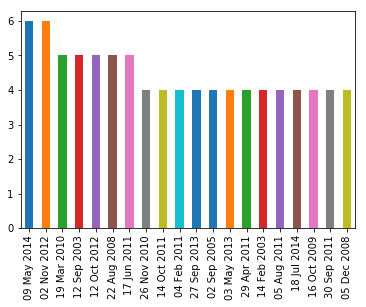

In [49]:
#realeaseDatewise movie count
movieDetailDf['releaseDate'].value_counts().head(20).plot(kind='bar')

### As we can see on 09 May 2014 and 02 Nov 2012 highest number of movies released (i.e. 6)

In [50]:
#task 1
#search movies based on genre

def searchGenre(genre):
    for idx, row in movieDetailDf.iterrows():
        if isinstance(row['genre'], str):
            if genre in row['genre']:
                print(row['title'])

genre = input("Enter genre: ").capitalize()
print("Below movies has "+ genre)
searchGenre(genre)

Enter genre: horror
Below movies has Horror
Jaani Dushman: Ek Anokhi Kahani
Bhoot
Kucch To Hai
Darna Mana Hai
Sssshhh...
Hawa
Saaya
Hum Kaun Hai?
Krishna Cottage
Vaastu Shastra
Rakht
Naina
Gumnam Qatil
Darwaza
C U at 9
Anjaane: The Unkown
Gauri: The Unborn
A Flat
30 Days
Bhool Bhulaiyaa
Hisss
Phoonk
1920
Raaz: The Mystery Continues
13B: Fear Has a New Address
Agyaat: The Unknown
Shaapit: The Cursed
Muskurake Dekh Zara
Rokkk
Phoonk 2
Swaha: Life Beyond Superstition
Help
Bachao - Inside Bhoot Hai...
Kaalo
Haunted - 3D
Ragini MMS
Mallika
Aagaah: The Warning
Raaz 3: The Third Dimension
Koi Hai
Ghost
Machhli Jal Ki Rani Hai
1920: Evil Returns
Siyaah..
2 Nights in Soul Valley
?: A Question Mark
Aatma
3G - A Killer Connection
Bhoot Returns
Ek Thi Daayan
Ragini MMS 2
Rise of the Zombie
Mumbai 125 KM 3D
Horror Story
Darr @ the Mall
Neighbours
Creature
3 AM: A Paranormal Experience
Pizza
Trip to Bhangarh


In [51]:
#task 2
#search movies based on releaseDate

def changeDateFormat(dateString):
    releaseDate = datetime.strptime(dateString,'%m-%d-%Y').strftime("%d") + " "+ datetime.strptime(dateString,'%m-%d-%Y').strftime("%B")[:3] + " "+datetime.strptime(dateString,'%m-%d-%Y').strftime("%Y")
    return releaseDate

releaseDate = input("Enter the releaseDate(mm-dd-yyyy): ")
if re.match("\\d{2}-\\d{2}-\\d{4}", releaseDate):
    releaseDate = changeDateFormat(releaseDate)
    df = movieDetailDf.loc[movieDetailDf['releaseDate'] == releaseDate][['title','releaseDate']]
    if not df.empty:
        print("Here's the list of movies released on", releaseDate)
        print(df)
    else:
        print("No movie released on", releaseDate)
else:
    print("Enter date in specified format!")

Enter the releaseDate(mm-dd-yyyy): 11-26-2010
Here's the list of movies released on 26 Nov 2010
               title  releaseDate
698  Allah Ke Banday  26 Nov 2010
796    Break Ke Baad  26 Nov 2010
866          Payback  26 Nov 2010
934      Khuda Kasam  26 Nov 2010


In [52]:
#task2 extended for release year
#search movies based on releaseYear
releaseYear = input("Enter the releaseYear(yyyy): ")
if re.match("\\d{4}", releaseYear):
    releaseYear = int(releaseYear)
    df = movieDetailDf.loc[movieDetailDf['releaseYear'] == releaseYear][['title','releaseDate']]
    if not df.empty:
        print("Here's the list of movies released in year", releaseYear)
        print(df)
    else:
        print("No Details available for movies released in year", releaseYear)
else:
    print("Enter release year in specified format!")

Enter the releaseYear(yyyy): 2014
Here's the list of movies released in year 2014
                              title  releaseDate
253                  Action Jackson  05 Dec 2014
502       Bhopal: A Prayer for Rain  07 Nov 2014
626                          Jai Ho  24 Jan 2014
987            Kya Dilli Kya Lahore  02 May 2014
1029                  Unforgettable  13 Jun 2014
1035                        Station  28 Mar 2014
1041        Machhli Jal Ki Rani Hai  13 Jun 2014
1046            Main Aur Mr. Riight  12 Dec 2014
1047                  Identity Card  29 Aug 2014
1072                        Riyasat  18 Jul 2014
1079                Singham Returns  15 Aug 2014
1082                      Tamanchey  10 Oct 2014
1092                             PK  19 Dec 2014
1113                           Kick  25 Jul 2014
1114                       2 States  18 Apr 2014
1132                        Khwaabb  09 May 2014
1136                 Happy New Year  24 Oct 2014
1140                        Holiday 

In [53]:
#required functions for task 3.1 and 3.2

#returns list of directors of movie
def getDirectors(movie):
    directors = movieDetailDf.loc[movieDetailDf['title'].str.lower() == movie]['directors'].values[0]
    if len(directors) != 0:
        return directors.split(" | ")
    else:
        print("Details of directors for "+ movie +" are not present.")

#returns list of actors from movie
def getActors(movie):
    actors = movieDetailDf.loc[movieDetailDf['title'].str.lower() == movie]['actors'].values[0]
    if len(actors) != 0:
        return actors.split(" | ")
    else:
        print("Details of actors for "+ movie +" are not present.")

#returns no. of movies of actor
def getActorMovieCount(name):
    count = actorRankingDf.loc[actorRankingDf['actorName'] == name]['movieCount'].values[0]
    return count

#returns no. of movies of director
def getDirectorMovieCount(name):
    count = directorRankingDf.loc[directorRankingDf['directorName'] == name]['movieCount'].values[0]
    return count

#returns rating of actor
def getActorRating(name):
    rating = actorRankingDf.loc[actorRankingDf['actorName'] == name]['normalizedRating'].values[0]
    return rating

#returns rating of director
def getDirectorRating(name):
    rating = directorRankingDf.loc[directorRankingDf['directorName'] == name]['normalizedRating'].values[0]
    return rating


#returns common elements from two lists
def findCommon(l1, l2):
    s1 = set(l1)
    s2 = set(l2)
    return list(s1.intersection(s2))

#some required data
all_titles = list(movieDetailDf['title'].str.lower().values)
all_actors = list(actorRankingDf['actorName'].str.lower().values)
all_directors = list(directorRankingDf['directorName'].str.lower().values)

In [55]:
#task 3.1
#details of actors and directors from movie name
movie = input("Enter title of movie: ").lower()

if movie in all_titles:
    print("Title:       ",movie.capitalize())
    print()
    movieDirectors = getDirectors(movie)
    print("########Details of directors(Number of movies and Rating)########")
    for director in movieDirectors:
        if director.lower() in all_directors:
            print(director,"directed", getDirectorMovieCount(director),"movies and rating is", "{0:.2f}".format(getDirectorRating(director)))
        else:
            print("No details available for", director)
    print()
    movieActors = getActors(movie)
    print("########Details of actors(Number of movies and Rating)########")
    for actor in movieActors:
        if actor.lower() in all_actors:
            print(actor,"worked in", getActorMovieCount(actor),"movies and rating is", "{0:.2f}".format(getActorRating(actor)))
        else:
            print("No details available for", actor)
else:
    print("Sorry! No details available for", movie.capitalize())

Enter title of movie: ready
Title:        Ready

########Details of directors(Number of movies and Rating)########
Anees Bazmee directed 7 movies and rating is 5.61

########Details of actors(Number of movies and Rating)########
Salman Khan worked in 36 movies and rating is 9.21
Asin worked in 5 movies and rating is 6.75
Paresh Rawal worked in 30 movies and rating is 3.80
Mahesh Manjrekar worked in 12 movies and rating is 2.86


In [56]:
#task 3.2
#displays common actors and directors from pair of movies

print("Enter two movie names..")
movie1 = input("1st movie title plz..: ").lower()
movie2 = input("2nd movie title plz..: ").lower()

if movie1 in all_titles and movie2 in all_titles:
    #for common actors
    actorsMovie1 = getActors(movie1)
    actorsMovie2 = getActors(movie2)
    commonActors = findCommon(actorsMovie1, actorsMovie2)
    if len(commonActors) != 0:
        print("Common actors in "+movie1+" and "+movie2)
        for actor in commonActors:
            print("  " + actor)
    else:
        print(movie1+" and "+movie2+" dont have common actors.")

    #for common directors
    directorsMovie1 = getDirectors(movie1)
    directorsMovie2 = getDirectors(movie2)
    commonDirectors = findCommon(directorsMovie1, directorsMovie2)
    if len(commonDirectors) != 0:
        print("Common directors in "+movie1.capitalize()+" and "+movie2.capitalize())
        for director in commonDirectors:
            print("  " + director)
    else:
        print(movie1+" and "+movie2+" dont have common directors.")
else:
    print("Seems like i dont have details of these movies.Please enter different movie names..!")


Enter two movie names..
1st movie title plz..: ready
2nd movie title plz..: wanted
Common actors in ready and wanted
  Mahesh Manjrekar
  Salman Khan
ready and wanted dont have common directors.
